# I. PRZYGOTOWANIE DANYCH


## Zmienienie nazw plików na uporządkowane

In [ ]:
import os

FOLDER_PATH = "images"
EXTENSIONS = (".jpg", ".jpeg", ".png")

files = sorted([
    f for f in os.listdir(FOLDER_PATH)
    if f.lower().endswith(EXTENSIONS)
])

for i, filename in enumerate(files, start=1):
    old_path = os.path.join(FOLDER_PATH, filename)
    ext = os.path.splitext(filename)[1].lower()
    new_name = f"image{i}{ext}"
    new_path = os.path.join(FOLDER_PATH, new_name)
    os.rename(old_path, new_path)

print(f"Zmieniono nazwy {len(files)} plików.")


## Usuwanie zawartości katalogu

In [ ]:
import os

LABELS_DIR = "dataset/labels"

for file in os.listdir(LABELS_DIR):
    file_path = os.path.join(LABELS_DIR, file)
    if os.path.isfile(file_path):
        os.remove(file_path)

print("Zawartość katalogu labels została usunięta.")




Zawartość katalogu labels została usunięta.


# II. Konfiguracja środowiska obliczeniowego


## Pobranie repozytorium YOLOv5

In [ ]:
!git clone https://github.com/ultralytics/yolov5

## Instalacja zależności YOLOv5


In [ ]:
!pip install -r yolov5/requirements.txt

## Sprawdzanie czy model YOLOv5 jest załadowany

In [ ]:
import torch

model = torch.hub.load(
    'ultralytics/yolov5',
    'yolov5s',
    pretrained=True
)

print("Model YOLOv5 załadowany")




/usr/local/lib/python3.12/dist-packages/torch/hub.py:335: UserWarning: You are about to download and run code from an untrusted repository. In a future release, this won't be allowed. To add the repository to your trusted list, change the command to {calling_fn}(..., trust_repo=False) and a command prompt will appear asking for an explicit confirmation of trust, or load(..., trust_repo=True), which will assume that the prompt is to be answered with 'yes'. You can also use load(..., trust_repo='check') which will only prompt for confirmation if the repo is not already trusted. This will eventually be the default behaviour
  warnings.warn(


Downloading: "https://github.com/ultralytics/yolov5/zipball/master" to /root/.cache/torch/hub/master.zip
Creating new Ultralytics Settings v0.0.6 file ✅ 
View Ultralytics Settings with 'yolo settings' or at '/root/.config/Ultralytics/settings.json'
Update Settings with 'yolo settings key=value', i.e. 'yolo settings runs_dir=path/to/dir'. For help see https://docs.ultralytics.com/quickstart/#ultralytics-settings.


YOLOv5 🚀 2026-1-17 Python-3.12.12 torch-2.9.0+cu126 CUDA:0 (Tesla T4, 15095MiB)

100%|██████████| 14.1M/14.1M [00:00<00:00, 104MB/s] 

Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 


Model YOLOv5 załadowany


# III. ETYKIETOWANIE

## Etykietowanie automatyczne


In [ ]:
import os
import torch
from PIL import Image

IMAGES_DIR = "dataset/images"
LABELS_DIR = "dataset/labels"

CONFIDENCE_THRESHOLD = 0.3
CLASS_NAME = "car"
CLASS_ID = 0

os.makedirs(LABELS_DIR, exist_ok=True)

model = torch.hub.load(
    'ultralytics/yolov5',
    'yolov5s',
    pretrained=True
)

model.conf = CONFIDENCE_THRESHOLD

image_files = sorted([
    f for f in os.listdir(IMAGES_DIR)
    if f.lower().endswith((".jpg", ".jpeg", ".png"))
])

print(f"Znaleziono {len(image_files)} zdjęć")

for image_name in image_files:
    image_path = os.path.join(IMAGES_DIR, image_name)
    results = model(image_path)

    img = Image.open(image_path)
    w, h = img.size

    label_path = os.path.join(
        LABELS_DIR,
        os.path.splitext(image_name)[0] + ".txt"
    )

    with open(label_path, "w") as f:
        for *box, conf, cls in results.xyxy[0].tolist():
            if model.names[int(cls)] != CLASS_NAME:
                continue

            x1, y1, x2, y2 = box
            xc = ((x1 + x2) / 2) / w
            yc = ((y1 + y2) / 2) / h
            bw = (x2 - x1) / w
            bh = (y2 - y1) / h

            f.write(
                f"{CLASS_ID} {xc:.6f} {yc:.6f} {bw:.6f} {bh:.6f}\n"
            )

    print(f"✔ {image_name}")

print("Etykietowanie zakończone")


Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 2026-1-17 Python-3.12.12 torch-2.9.0+cpu CPU

Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
/root/.cache/torch/hub/ultralytics_yolov5_master/models/common.py:899: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):


Znaleziono 405 zdjęć
✔ image1.png


/root/.cache/torch/hub/ultralytics_yolov5_master/models/common.py:899: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):


✔ image10.png


/root/.cache/torch/hub/ultralytics_yolov5_master/models/common.py:899: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):


✔ image100.png


/root/.cache/torch/hub/ultralytics_yolov5_master/models/common.py:899: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):


✔ image101.png


/root/.cache/torch/hub/ultralytics_yolov5_master/models/common.py:899: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):


✔ image102.png


/root/.cache/torch/hub/ultralytics_yolov5_master/models/common.py:899: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):


✔ image103.png


/root/.cache/torch/hub/ultralytics_yolov5_master/models/common.py:899: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):


✔ image104.png


/root/.cache/torch/hub/ultralytics_yolov5_master/models/common.py:899: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):


✔ image105.png


/root/.cache/torch/hub/ultralytics_yolov5_master/models/common.py:899: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):


✔ image106.png


/root/.cache/torch/hub/ultralytics_yolov5_master/models/common.py:899: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):


✔ image107.png


/root/.cache/torch/hub/ultralytics_yolov5_master/models/common.py:899: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):


✔ image108.png


/root/.cache/torch/hub/ultralytics_yolov5_master/models/common.py:899: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):


✔ image109.png


/root/.cache/torch/hub/ultralytics_yolov5_master/models/common.py:899: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):


✔ image11.png


/root/.cache/torch/hub/ultralytics_yolov5_master/models/common.py:899: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):


✔ image110.png


/root/.cache/torch/hub/ultralytics_yolov5_master/models/common.py:899: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):


✔ image111.png


/root/.cache/torch/hub/ultralytics_yolov5_master/models/common.py:899: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):


✔ image112.png


/root/.cache/torch/hub/ultralytics_yolov5_master/models/common.py:899: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):


✔ image113.png


/root/.cache/torch/hub/ultralytics_yolov5_master/models/common.py:899: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):


✔ image114.png


/root/.cache/torch/hub/ultralytics_yolov5_master/models/common.py:899: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):


✔ image115.png


/root/.cache/torch/hub/ultralytics_yolov5_master/models/common.py:899: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):


✔ image116.png


/root/.cache/torch/hub/ultralytics_yolov5_master/models/common.py:899: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):


✔ image117.png


/root/.cache/torch/hub/ultralytics_yolov5_master/models/common.py:899: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):


✔ image118.png


/root/.cache/torch/hub/ultralytics_yolov5_master/models/common.py:899: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):


✔ image119.png


/root/.cache/torch/hub/ultralytics_yolov5_master/models/common.py:899: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):


✔ image12.png


/root/.cache/torch/hub/ultralytics_yolov5_master/models/common.py:899: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):


✔ image120.png


/root/.cache/torch/hub/ultralytics_yolov5_master/models/common.py:899: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):


✔ image121.png


/root/.cache/torch/hub/ultralytics_yolov5_master/models/common.py:899: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):


✔ image122.png


/root/.cache/torch/hub/ultralytics_yolov5_master/models/common.py:899: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):


✔ image123.png


/root/.cache/torch/hub/ultralytics_yolov5_master/models/common.py:899: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):


✔ image124.png


/root/.cache/torch/hub/ultralytics_yolov5_master/models/common.py:899: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):


✔ image125.png


/root/.cache/torch/hub/ultralytics_yolov5_master/models/common.py:899: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):


✔ image126.png


/root/.cache/torch/hub/ultralytics_yolov5_master/models/common.py:899: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):


✔ image127.png


/root/.cache/torch/hub/ultralytics_yolov5_master/models/common.py:899: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):


✔ image128.png


/root/.cache/torch/hub/ultralytics_yolov5_master/models/common.py:899: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):


✔ image129.png


/root/.cache/torch/hub/ultralytics_yolov5_master/models/common.py:899: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):


✔ image13.png


/root/.cache/torch/hub/ultralytics_yolov5_master/models/common.py:899: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):


✔ image130.png


/root/.cache/torch/hub/ultralytics_yolov5_master/models/common.py:899: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):


✔ image131.png


/root/.cache/torch/hub/ultralytics_yolov5_master/models/common.py:899: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):


✔ image132.png


/root/.cache/torch/hub/ultralytics_yolov5_master/models/common.py:899: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):


✔ image133.png


/root/.cache/torch/hub/ultralytics_yolov5_master/models/common.py:899: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):


✔ image134.png


/root/.cache/torch/hub/ultralytics_yolov5_master/models/common.py:899: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):


✔ image135.png


/root/.cache/torch/hub/ultralytics_yolov5_master/models/common.py:899: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):


✔ image136.png


/root/.cache/torch/hub/ultralytics_yolov5_master/models/common.py:899: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):


✔ image137.png


/root/.cache/torch/hub/ultralytics_yolov5_master/models/common.py:899: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):


✔ image138.png


/root/.cache/torch/hub/ultralytics_yolov5_master/models/common.py:899: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):


✔ image139.png


/root/.cache/torch/hub/ultralytics_yolov5_master/models/common.py:899: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):


✔ image14.png


/root/.cache/torch/hub/ultralytics_yolov5_master/models/common.py:899: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):


✔ image140.png


/root/.cache/torch/hub/ultralytics_yolov5_master/models/common.py:899: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):


✔ image141.png


/root/.cache/torch/hub/ultralytics_yolov5_master/models/common.py:899: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):


✔ image142.png


/root/.cache/torch/hub/ultralytics_yolov5_master/models/common.py:899: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):


✔ image143.png


/root/.cache/torch/hub/ultralytics_yolov5_master/models/common.py:899: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):


✔ image144.png


/root/.cache/torch/hub/ultralytics_yolov5_master/models/common.py:899: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):


✔ image145.png


/root/.cache/torch/hub/ultralytics_yolov5_master/models/common.py:899: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):


✔ image146.png


/root/.cache/torch/hub/ultralytics_yolov5_master/models/common.py:899: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):


✔ image147.png


/root/.cache/torch/hub/ultralytics_yolov5_master/models/common.py:899: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):


✔ image148.png


/root/.cache/torch/hub/ultralytics_yolov5_master/models/common.py:899: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):


✔ image149.png


/root/.cache/torch/hub/ultralytics_yolov5_master/models/common.py:899: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):


✔ image15.png


/root/.cache/torch/hub/ultralytics_yolov5_master/models/common.py:899: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):


✔ image150.png


/root/.cache/torch/hub/ultralytics_yolov5_master/models/common.py:899: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):


✔ image151.png


/root/.cache/torch/hub/ultralytics_yolov5_master/models/common.py:899: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):


✔ image152.png


/root/.cache/torch/hub/ultralytics_yolov5_master/models/common.py:899: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):


✔ image153.png


/root/.cache/torch/hub/ultralytics_yolov5_master/models/common.py:899: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):


✔ image154.png


/root/.cache/torch/hub/ultralytics_yolov5_master/models/common.py:899: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):


✔ image155.png


/root/.cache/torch/hub/ultralytics_yolov5_master/models/common.py:899: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):


✔ image156.png


/root/.cache/torch/hub/ultralytics_yolov5_master/models/common.py:899: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):


✔ image157.png


/root/.cache/torch/hub/ultralytics_yolov5_master/models/common.py:899: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):


✔ image158.png


/root/.cache/torch/hub/ultralytics_yolov5_master/models/common.py:899: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):


✔ image159.png


/root/.cache/torch/hub/ultralytics_yolov5_master/models/common.py:899: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):


✔ image16.png


/root/.cache/torch/hub/ultralytics_yolov5_master/models/common.py:899: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):


✔ image160.png


/root/.cache/torch/hub/ultralytics_yolov5_master/models/common.py:899: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):


✔ image161.png


/root/.cache/torch/hub/ultralytics_yolov5_master/models/common.py:899: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):


✔ image162.png


/root/.cache/torch/hub/ultralytics_yolov5_master/models/common.py:899: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):


✔ image163.png


/root/.cache/torch/hub/ultralytics_yolov5_master/models/common.py:899: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):


✔ image164.png


/root/.cache/torch/hub/ultralytics_yolov5_master/models/common.py:899: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):


✔ image165.png


/root/.cache/torch/hub/ultralytics_yolov5_master/models/common.py:899: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):


✔ image166.png


/root/.cache/torch/hub/ultralytics_yolov5_master/models/common.py:899: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):


✔ image167.png


/root/.cache/torch/hub/ultralytics_yolov5_master/models/common.py:899: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):


✔ image168.png


/root/.cache/torch/hub/ultralytics_yolov5_master/models/common.py:899: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):


✔ image169.png


/root/.cache/torch/hub/ultralytics_yolov5_master/models/common.py:899: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):


✔ image17.png


/root/.cache/torch/hub/ultralytics_yolov5_master/models/common.py:899: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):


✔ image170.png


/root/.cache/torch/hub/ultralytics_yolov5_master/models/common.py:899: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):


✔ image171.png


/root/.cache/torch/hub/ultralytics_yolov5_master/models/common.py:899: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):


✔ image172.png


/root/.cache/torch/hub/ultralytics_yolov5_master/models/common.py:899: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):


✔ image173.png


/root/.cache/torch/hub/ultralytics_yolov5_master/models/common.py:899: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):


✔ image174.png


/root/.cache/torch/hub/ultralytics_yolov5_master/models/common.py:899: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):


✔ image175.png


/root/.cache/torch/hub/ultralytics_yolov5_master/models/common.py:899: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):


✔ image176.png


/root/.cache/torch/hub/ultralytics_yolov5_master/models/common.py:899: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):


✔ image177.png


/root/.cache/torch/hub/ultralytics_yolov5_master/models/common.py:899: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):


✔ image178.png


/root/.cache/torch/hub/ultralytics_yolov5_master/models/common.py:899: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):


✔ image179.png


/root/.cache/torch/hub/ultralytics_yolov5_master/models/common.py:899: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):


✔ image18.png


/root/.cache/torch/hub/ultralytics_yolov5_master/models/common.py:899: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):


✔ image180.png


/root/.cache/torch/hub/ultralytics_yolov5_master/models/common.py:899: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):


✔ image181.png


/root/.cache/torch/hub/ultralytics_yolov5_master/models/common.py:899: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):


✔ image182.png


/root/.cache/torch/hub/ultralytics_yolov5_master/models/common.py:899: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):


✔ image183.png


/root/.cache/torch/hub/ultralytics_yolov5_master/models/common.py:899: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):


✔ image184.png


/root/.cache/torch/hub/ultralytics_yolov5_master/models/common.py:899: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):


✔ image185.png


/root/.cache/torch/hub/ultralytics_yolov5_master/models/common.py:899: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):


✔ image186.png


/root/.cache/torch/hub/ultralytics_yolov5_master/models/common.py:899: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):


✔ image187.png


/root/.cache/torch/hub/ultralytics_yolov5_master/models/common.py:899: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):


✔ image188.png


/root/.cache/torch/hub/ultralytics_yolov5_master/models/common.py:899: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):


✔ image189.png


/root/.cache/torch/hub/ultralytics_yolov5_master/models/common.py:899: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):


✔ image19.png


/root/.cache/torch/hub/ultralytics_yolov5_master/models/common.py:899: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):


✔ image190.png


/root/.cache/torch/hub/ultralytics_yolov5_master/models/common.py:899: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):


✔ image191.png


/root/.cache/torch/hub/ultralytics_yolov5_master/models/common.py:899: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):


✔ image192.png


/root/.cache/torch/hub/ultralytics_yolov5_master/models/common.py:899: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):


✔ image193.png


/root/.cache/torch/hub/ultralytics_yolov5_master/models/common.py:899: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):


✔ image194.png


/root/.cache/torch/hub/ultralytics_yolov5_master/models/common.py:899: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):


✔ image195.png


/root/.cache/torch/hub/ultralytics_yolov5_master/models/common.py:899: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):


✔ image196.png


/root/.cache/torch/hub/ultralytics_yolov5_master/models/common.py:899: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):


✔ image197.png


/root/.cache/torch/hub/ultralytics_yolov5_master/models/common.py:899: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):


✔ image198.png


/root/.cache/torch/hub/ultralytics_yolov5_master/models/common.py:899: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):


✔ image199.png


/root/.cache/torch/hub/ultralytics_yolov5_master/models/common.py:899: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):


✔ image2.png


/root/.cache/torch/hub/ultralytics_yolov5_master/models/common.py:899: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):


✔ image20.png


/root/.cache/torch/hub/ultralytics_yolov5_master/models/common.py:899: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):


✔ image200.png


/root/.cache/torch/hub/ultralytics_yolov5_master/models/common.py:899: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):


✔ image201.png


/root/.cache/torch/hub/ultralytics_yolov5_master/models/common.py:899: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):


✔ image202.png


/root/.cache/torch/hub/ultralytics_yolov5_master/models/common.py:899: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):


✔ image203.png


/root/.cache/torch/hub/ultralytics_yolov5_master/models/common.py:899: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):


✔ image204.png


/root/.cache/torch/hub/ultralytics_yolov5_master/models/common.py:899: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):


✔ image205.png


/root/.cache/torch/hub/ultralytics_yolov5_master/models/common.py:899: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):


✔ image206.png


/root/.cache/torch/hub/ultralytics_yolov5_master/models/common.py:899: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):


✔ image207.png


/root/.cache/torch/hub/ultralytics_yolov5_master/models/common.py:899: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):


✔ image208.png


/root/.cache/torch/hub/ultralytics_yolov5_master/models/common.py:899: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):


✔ image209.png


/root/.cache/torch/hub/ultralytics_yolov5_master/models/common.py:899: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):


✔ image21.png


/root/.cache/torch/hub/ultralytics_yolov5_master/models/common.py:899: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):


✔ image210.png


/root/.cache/torch/hub/ultralytics_yolov5_master/models/common.py:899: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):


✔ image211.png


/root/.cache/torch/hub/ultralytics_yolov5_master/models/common.py:899: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):


✔ image212.png


/root/.cache/torch/hub/ultralytics_yolov5_master/models/common.py:899: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):


✔ image213.png


/root/.cache/torch/hub/ultralytics_yolov5_master/models/common.py:899: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):


✔ image214.png


/root/.cache/torch/hub/ultralytics_yolov5_master/models/common.py:899: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):


✔ image215.png


/root/.cache/torch/hub/ultralytics_yolov5_master/models/common.py:899: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):


✔ image216.png


/root/.cache/torch/hub/ultralytics_yolov5_master/models/common.py:899: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):


✔ image217.png


/root/.cache/torch/hub/ultralytics_yolov5_master/models/common.py:899: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):


✔ image218.png


/root/.cache/torch/hub/ultralytics_yolov5_master/models/common.py:899: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):


✔ image219.png


/root/.cache/torch/hub/ultralytics_yolov5_master/models/common.py:899: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):


✔ image22.png


/root/.cache/torch/hub/ultralytics_yolov5_master/models/common.py:899: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):


✔ image220.png


/root/.cache/torch/hub/ultralytics_yolov5_master/models/common.py:899: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):


✔ image221.png


/root/.cache/torch/hub/ultralytics_yolov5_master/models/common.py:899: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):


✔ image222.png


/root/.cache/torch/hub/ultralytics_yolov5_master/models/common.py:899: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):


✔ image223.png


/root/.cache/torch/hub/ultralytics_yolov5_master/models/common.py:899: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):


✔ image224.png


/root/.cache/torch/hub/ultralytics_yolov5_master/models/common.py:899: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):


✔ image225.png


/root/.cache/torch/hub/ultralytics_yolov5_master/models/common.py:899: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):


✔ image226.png


/root/.cache/torch/hub/ultralytics_yolov5_master/models/common.py:899: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):


✔ image227.png


/root/.cache/torch/hub/ultralytics_yolov5_master/models/common.py:899: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):


✔ image228.png


/root/.cache/torch/hub/ultralytics_yolov5_master/models/common.py:899: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):


✔ image229.png


/root/.cache/torch/hub/ultralytics_yolov5_master/models/common.py:899: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):


✔ image23.png


/root/.cache/torch/hub/ultralytics_yolov5_master/models/common.py:899: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):


✔ image230.png


/root/.cache/torch/hub/ultralytics_yolov5_master/models/common.py:899: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):


✔ image231.png


/root/.cache/torch/hub/ultralytics_yolov5_master/models/common.py:899: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):


✔ image232.png


/root/.cache/torch/hub/ultralytics_yolov5_master/models/common.py:899: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):


✔ image233.png


/root/.cache/torch/hub/ultralytics_yolov5_master/models/common.py:899: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):


✔ image234.png


/root/.cache/torch/hub/ultralytics_yolov5_master/models/common.py:899: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):


✔ image235.png


/root/.cache/torch/hub/ultralytics_yolov5_master/models/common.py:899: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):


✔ image236.png


/root/.cache/torch/hub/ultralytics_yolov5_master/models/common.py:899: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):


✔ image237.png


/root/.cache/torch/hub/ultralytics_yolov5_master/models/common.py:899: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):


✔ image238.png


/root/.cache/torch/hub/ultralytics_yolov5_master/models/common.py:899: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):


✔ image239.png


/root/.cache/torch/hub/ultralytics_yolov5_master/models/common.py:899: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):


✔ image24.png


/root/.cache/torch/hub/ultralytics_yolov5_master/models/common.py:899: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):


✔ image240.png


/root/.cache/torch/hub/ultralytics_yolov5_master/models/common.py:899: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):


✔ image241.png


/root/.cache/torch/hub/ultralytics_yolov5_master/models/common.py:899: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):


✔ image242.png


/root/.cache/torch/hub/ultralytics_yolov5_master/models/common.py:899: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):


✔ image243.png


/root/.cache/torch/hub/ultralytics_yolov5_master/models/common.py:899: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):


✔ image244.png


/root/.cache/torch/hub/ultralytics_yolov5_master/models/common.py:899: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):


✔ image245.png


/root/.cache/torch/hub/ultralytics_yolov5_master/models/common.py:899: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):


✔ image246.png


/root/.cache/torch/hub/ultralytics_yolov5_master/models/common.py:899: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):


✔ image247.png


/root/.cache/torch/hub/ultralytics_yolov5_master/models/common.py:899: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):


✔ image248.png


/root/.cache/torch/hub/ultralytics_yolov5_master/models/common.py:899: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):


✔ image249.png


/root/.cache/torch/hub/ultralytics_yolov5_master/models/common.py:899: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):


✔ image25.png


/root/.cache/torch/hub/ultralytics_yolov5_master/models/common.py:899: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):


✔ image250.png


/root/.cache/torch/hub/ultralytics_yolov5_master/models/common.py:899: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):


✔ image251.png


/root/.cache/torch/hub/ultralytics_yolov5_master/models/common.py:899: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):


✔ image252.png


/root/.cache/torch/hub/ultralytics_yolov5_master/models/common.py:899: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):


✔ image253.png


/root/.cache/torch/hub/ultralytics_yolov5_master/models/common.py:899: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):


✔ image254.png


/root/.cache/torch/hub/ultralytics_yolov5_master/models/common.py:899: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):


✔ image255.png


/root/.cache/torch/hub/ultralytics_yolov5_master/models/common.py:899: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):


✔ image256.png


/root/.cache/torch/hub/ultralytics_yolov5_master/models/common.py:899: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):


✔ image257.png


/root/.cache/torch/hub/ultralytics_yolov5_master/models/common.py:899: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):


✔ image258.png


/root/.cache/torch/hub/ultralytics_yolov5_master/models/common.py:899: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):


✔ image259.png


/root/.cache/torch/hub/ultralytics_yolov5_master/models/common.py:899: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):


✔ image26.png


/root/.cache/torch/hub/ultralytics_yolov5_master/models/common.py:899: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):


✔ image260.png


/root/.cache/torch/hub/ultralytics_yolov5_master/models/common.py:899: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):


✔ image261.png


/root/.cache/torch/hub/ultralytics_yolov5_master/models/common.py:899: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):


✔ image262.png


/root/.cache/torch/hub/ultralytics_yolov5_master/models/common.py:899: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):


✔ image263.png


/root/.cache/torch/hub/ultralytics_yolov5_master/models/common.py:899: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):


✔ image264.png


/root/.cache/torch/hub/ultralytics_yolov5_master/models/common.py:899: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):


✔ image265.png


/root/.cache/torch/hub/ultralytics_yolov5_master/models/common.py:899: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):


✔ image266.png


/root/.cache/torch/hub/ultralytics_yolov5_master/models/common.py:899: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):


✔ image267.png


/root/.cache/torch/hub/ultralytics_yolov5_master/models/common.py:899: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):


✔ image268.png


/root/.cache/torch/hub/ultralytics_yolov5_master/models/common.py:899: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):


✔ image269.png


/root/.cache/torch/hub/ultralytics_yolov5_master/models/common.py:899: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):


✔ image27.png


/root/.cache/torch/hub/ultralytics_yolov5_master/models/common.py:899: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):


✔ image270.png


/root/.cache/torch/hub/ultralytics_yolov5_master/models/common.py:899: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):


✔ image271.png


/root/.cache/torch/hub/ultralytics_yolov5_master/models/common.py:899: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):


✔ image272.png


/root/.cache/torch/hub/ultralytics_yolov5_master/models/common.py:899: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):


✔ image273.png


/root/.cache/torch/hub/ultralytics_yolov5_master/models/common.py:899: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):


✔ image274.png


/root/.cache/torch/hub/ultralytics_yolov5_master/models/common.py:899: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):


✔ image275.png


/root/.cache/torch/hub/ultralytics_yolov5_master/models/common.py:899: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):


✔ image276.png


/root/.cache/torch/hub/ultralytics_yolov5_master/models/common.py:899: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):


✔ image277.png


/root/.cache/torch/hub/ultralytics_yolov5_master/models/common.py:899: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):


✔ image278.png


/root/.cache/torch/hub/ultralytics_yolov5_master/models/common.py:899: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):


✔ image279.png


/root/.cache/torch/hub/ultralytics_yolov5_master/models/common.py:899: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):


✔ image28.png


/root/.cache/torch/hub/ultralytics_yolov5_master/models/common.py:899: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):


✔ image280.png


/root/.cache/torch/hub/ultralytics_yolov5_master/models/common.py:899: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):


✔ image281.png


/root/.cache/torch/hub/ultralytics_yolov5_master/models/common.py:899: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):


✔ image282.png


/root/.cache/torch/hub/ultralytics_yolov5_master/models/common.py:899: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):


✔ image283.png


/root/.cache/torch/hub/ultralytics_yolov5_master/models/common.py:899: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):


✔ image284.png


/root/.cache/torch/hub/ultralytics_yolov5_master/models/common.py:899: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):


✔ image285.png


/root/.cache/torch/hub/ultralytics_yolov5_master/models/common.py:899: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):


✔ image286.png


/root/.cache/torch/hub/ultralytics_yolov5_master/models/common.py:899: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):


✔ image287.png


/root/.cache/torch/hub/ultralytics_yolov5_master/models/common.py:899: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):


✔ image288.png


/root/.cache/torch/hub/ultralytics_yolov5_master/models/common.py:899: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):


✔ image289.png


/root/.cache/torch/hub/ultralytics_yolov5_master/models/common.py:899: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):


✔ image29.png


/root/.cache/torch/hub/ultralytics_yolov5_master/models/common.py:899: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):


✔ image290.png


/root/.cache/torch/hub/ultralytics_yolov5_master/models/common.py:899: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):


✔ image291.png


/root/.cache/torch/hub/ultralytics_yolov5_master/models/common.py:899: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):


✔ image292.png


/root/.cache/torch/hub/ultralytics_yolov5_master/models/common.py:899: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):


✔ image293.png


/root/.cache/torch/hub/ultralytics_yolov5_master/models/common.py:899: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):


✔ image294.png


/root/.cache/torch/hub/ultralytics_yolov5_master/models/common.py:899: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):


✔ image295.png


/root/.cache/torch/hub/ultralytics_yolov5_master/models/common.py:899: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):


✔ image296.png


/root/.cache/torch/hub/ultralytics_yolov5_master/models/common.py:899: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):


✔ image297.png


/root/.cache/torch/hub/ultralytics_yolov5_master/models/common.py:899: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):


✔ image298.png


/root/.cache/torch/hub/ultralytics_yolov5_master/models/common.py:899: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):


✔ image299.png


/root/.cache/torch/hub/ultralytics_yolov5_master/models/common.py:899: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):


✔ image3.png


/root/.cache/torch/hub/ultralytics_yolov5_master/models/common.py:899: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):


✔ image30.png


/root/.cache/torch/hub/ultralytics_yolov5_master/models/common.py:899: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):


✔ image300.png


/root/.cache/torch/hub/ultralytics_yolov5_master/models/common.py:899: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):


✔ image301.png


/root/.cache/torch/hub/ultralytics_yolov5_master/models/common.py:899: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):


✔ image302.png


/root/.cache/torch/hub/ultralytics_yolov5_master/models/common.py:899: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):


✔ image303.png


/root/.cache/torch/hub/ultralytics_yolov5_master/models/common.py:899: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):


✔ image304.png


/root/.cache/torch/hub/ultralytics_yolov5_master/models/common.py:899: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):


✔ image305.png


/root/.cache/torch/hub/ultralytics_yolov5_master/models/common.py:899: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):


✔ image306.png


/root/.cache/torch/hub/ultralytics_yolov5_master/models/common.py:899: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):


✔ image307.png


/root/.cache/torch/hub/ultralytics_yolov5_master/models/common.py:899: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):


✔ image308.png


/root/.cache/torch/hub/ultralytics_yolov5_master/models/common.py:899: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):


✔ image309.png


/root/.cache/torch/hub/ultralytics_yolov5_master/models/common.py:899: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):


✔ image31.png


/root/.cache/torch/hub/ultralytics_yolov5_master/models/common.py:899: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):


✔ image310.png


/root/.cache/torch/hub/ultralytics_yolov5_master/models/common.py:899: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):


✔ image311.png


/root/.cache/torch/hub/ultralytics_yolov5_master/models/common.py:899: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):


✔ image312.png


/root/.cache/torch/hub/ultralytics_yolov5_master/models/common.py:899: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):


✔ image313.png


/root/.cache/torch/hub/ultralytics_yolov5_master/models/common.py:899: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):


✔ image314.png


/root/.cache/torch/hub/ultralytics_yolov5_master/models/common.py:899: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):


✔ image315.png


/root/.cache/torch/hub/ultralytics_yolov5_master/models/common.py:899: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):


✔ image316.png


/root/.cache/torch/hub/ultralytics_yolov5_master/models/common.py:899: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):


✔ image317.png


/root/.cache/torch/hub/ultralytics_yolov5_master/models/common.py:899: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):


✔ image318.png


/root/.cache/torch/hub/ultralytics_yolov5_master/models/common.py:899: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):


✔ image319.png


/root/.cache/torch/hub/ultralytics_yolov5_master/models/common.py:899: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):


✔ image32.png


/root/.cache/torch/hub/ultralytics_yolov5_master/models/common.py:899: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):


✔ image320.png


/root/.cache/torch/hub/ultralytics_yolov5_master/models/common.py:899: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):


✔ image321.png


/root/.cache/torch/hub/ultralytics_yolov5_master/models/common.py:899: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):


✔ image322.png


/root/.cache/torch/hub/ultralytics_yolov5_master/models/common.py:899: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):


✔ image323.png


/root/.cache/torch/hub/ultralytics_yolov5_master/models/common.py:899: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):


✔ image324.png


/root/.cache/torch/hub/ultralytics_yolov5_master/models/common.py:899: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):


✔ image325.png


/root/.cache/torch/hub/ultralytics_yolov5_master/models/common.py:899: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):


✔ image326.png


/root/.cache/torch/hub/ultralytics_yolov5_master/models/common.py:899: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):


✔ image327.png


/root/.cache/torch/hub/ultralytics_yolov5_master/models/common.py:899: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):


✔ image328.png


/root/.cache/torch/hub/ultralytics_yolov5_master/models/common.py:899: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):


✔ image329.png


/root/.cache/torch/hub/ultralytics_yolov5_master/models/common.py:899: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):


✔ image33.png


/root/.cache/torch/hub/ultralytics_yolov5_master/models/common.py:899: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):


✔ image330.png


/root/.cache/torch/hub/ultralytics_yolov5_master/models/common.py:899: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):


✔ image331.png


/root/.cache/torch/hub/ultralytics_yolov5_master/models/common.py:899: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):


✔ image332.png


/root/.cache/torch/hub/ultralytics_yolov5_master/models/common.py:899: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):


✔ image333.png


/root/.cache/torch/hub/ultralytics_yolov5_master/models/common.py:899: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):


✔ image334.png


/root/.cache/torch/hub/ultralytics_yolov5_master/models/common.py:899: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):


✔ image335.png


/root/.cache/torch/hub/ultralytics_yolov5_master/models/common.py:899: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):


✔ image336.png


/root/.cache/torch/hub/ultralytics_yolov5_master/models/common.py:899: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):


✔ image337.png


/root/.cache/torch/hub/ultralytics_yolov5_master/models/common.py:899: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):


✔ image338.png


/root/.cache/torch/hub/ultralytics_yolov5_master/models/common.py:899: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):


✔ image339.png


/root/.cache/torch/hub/ultralytics_yolov5_master/models/common.py:899: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):


✔ image34.png


/root/.cache/torch/hub/ultralytics_yolov5_master/models/common.py:899: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):


✔ image340.png


/root/.cache/torch/hub/ultralytics_yolov5_master/models/common.py:899: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):


✔ image341.png


/root/.cache/torch/hub/ultralytics_yolov5_master/models/common.py:899: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):


✔ image342.png


/root/.cache/torch/hub/ultralytics_yolov5_master/models/common.py:899: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):


✔ image343.png


/root/.cache/torch/hub/ultralytics_yolov5_master/models/common.py:899: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):


✔ image344.png


/root/.cache/torch/hub/ultralytics_yolov5_master/models/common.py:899: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):


✔ image345.png


/root/.cache/torch/hub/ultralytics_yolov5_master/models/common.py:899: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):


✔ image346.png


/root/.cache/torch/hub/ultralytics_yolov5_master/models/common.py:899: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):


✔ image347.png


/root/.cache/torch/hub/ultralytics_yolov5_master/models/common.py:899: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):


✔ image348.png


/root/.cache/torch/hub/ultralytics_yolov5_master/models/common.py:899: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):


✔ image349.png


/root/.cache/torch/hub/ultralytics_yolov5_master/models/common.py:899: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):


✔ image35.png


/root/.cache/torch/hub/ultralytics_yolov5_master/models/common.py:899: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):


✔ image350.png


/root/.cache/torch/hub/ultralytics_yolov5_master/models/common.py:899: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):


✔ image351.png


/root/.cache/torch/hub/ultralytics_yolov5_master/models/common.py:899: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):


✔ image352.png


/root/.cache/torch/hub/ultralytics_yolov5_master/models/common.py:899: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):


✔ image353.png


/root/.cache/torch/hub/ultralytics_yolov5_master/models/common.py:899: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):


✔ image354.png


/root/.cache/torch/hub/ultralytics_yolov5_master/models/common.py:899: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):


✔ image355.png


/root/.cache/torch/hub/ultralytics_yolov5_master/models/common.py:899: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):


✔ image356.png


/root/.cache/torch/hub/ultralytics_yolov5_master/models/common.py:899: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):


✔ image357.png


/root/.cache/torch/hub/ultralytics_yolov5_master/models/common.py:899: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):


✔ image358.png


/root/.cache/torch/hub/ultralytics_yolov5_master/models/common.py:899: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):


✔ image359.png


/root/.cache/torch/hub/ultralytics_yolov5_master/models/common.py:899: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):


✔ image36.png


/root/.cache/torch/hub/ultralytics_yolov5_master/models/common.py:899: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):


✔ image360.png


/root/.cache/torch/hub/ultralytics_yolov5_master/models/common.py:899: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):


✔ image361.png


/root/.cache/torch/hub/ultralytics_yolov5_master/models/common.py:899: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):


✔ image362.png


/root/.cache/torch/hub/ultralytics_yolov5_master/models/common.py:899: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):


✔ image363.png


/root/.cache/torch/hub/ultralytics_yolov5_master/models/common.py:899: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):


✔ image364.png


/root/.cache/torch/hub/ultralytics_yolov5_master/models/common.py:899: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):


✔ image365.png


/root/.cache/torch/hub/ultralytics_yolov5_master/models/common.py:899: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):


✔ image366.png


/root/.cache/torch/hub/ultralytics_yolov5_master/models/common.py:899: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):


✔ image367.png


/root/.cache/torch/hub/ultralytics_yolov5_master/models/common.py:899: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):


✔ image368.png


/root/.cache/torch/hub/ultralytics_yolov5_master/models/common.py:899: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):


✔ image369.png


/root/.cache/torch/hub/ultralytics_yolov5_master/models/common.py:899: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):


✔ image37.png


/root/.cache/torch/hub/ultralytics_yolov5_master/models/common.py:899: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):


✔ image370.png


/root/.cache/torch/hub/ultralytics_yolov5_master/models/common.py:899: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):


✔ image371.png


/root/.cache/torch/hub/ultralytics_yolov5_master/models/common.py:899: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):


✔ image372.png


/root/.cache/torch/hub/ultralytics_yolov5_master/models/common.py:899: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):


✔ image373.png


/root/.cache/torch/hub/ultralytics_yolov5_master/models/common.py:899: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):


✔ image374.png


/root/.cache/torch/hub/ultralytics_yolov5_master/models/common.py:899: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):


✔ image375.png


/root/.cache/torch/hub/ultralytics_yolov5_master/models/common.py:899: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):


✔ image376.png


/root/.cache/torch/hub/ultralytics_yolov5_master/models/common.py:899: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):


✔ image377.png


/root/.cache/torch/hub/ultralytics_yolov5_master/models/common.py:899: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):


✔ image378.png


/root/.cache/torch/hub/ultralytics_yolov5_master/models/common.py:899: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):


✔ image379.png


/root/.cache/torch/hub/ultralytics_yolov5_master/models/common.py:899: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):


✔ image38.png


/root/.cache/torch/hub/ultralytics_yolov5_master/models/common.py:899: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):


✔ image380.png


/root/.cache/torch/hub/ultralytics_yolov5_master/models/common.py:899: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):


✔ image381.png


/root/.cache/torch/hub/ultralytics_yolov5_master/models/common.py:899: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):


✔ image382.png


/root/.cache/torch/hub/ultralytics_yolov5_master/models/common.py:899: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):


✔ image383.png


/root/.cache/torch/hub/ultralytics_yolov5_master/models/common.py:899: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):


✔ image384.png


/root/.cache/torch/hub/ultralytics_yolov5_master/models/common.py:899: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):


✔ image385.png


/root/.cache/torch/hub/ultralytics_yolov5_master/models/common.py:899: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):


✔ image386.png


/root/.cache/torch/hub/ultralytics_yolov5_master/models/common.py:899: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):


✔ image387.png


/root/.cache/torch/hub/ultralytics_yolov5_master/models/common.py:899: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):


✔ image388.png


/root/.cache/torch/hub/ultralytics_yolov5_master/models/common.py:899: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):


✔ image389.png


/root/.cache/torch/hub/ultralytics_yolov5_master/models/common.py:899: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):


✔ image39.png


/root/.cache/torch/hub/ultralytics_yolov5_master/models/common.py:899: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):


✔ image390.png


/root/.cache/torch/hub/ultralytics_yolov5_master/models/common.py:899: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):


✔ image391.png


/root/.cache/torch/hub/ultralytics_yolov5_master/models/common.py:899: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):


✔ image392.png


/root/.cache/torch/hub/ultralytics_yolov5_master/models/common.py:899: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):


✔ image393.png


/root/.cache/torch/hub/ultralytics_yolov5_master/models/common.py:899: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):


✔ image394.png


/root/.cache/torch/hub/ultralytics_yolov5_master/models/common.py:899: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):


✔ image395.png


/root/.cache/torch/hub/ultralytics_yolov5_master/models/common.py:899: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):


✔ image396.png


/root/.cache/torch/hub/ultralytics_yolov5_master/models/common.py:899: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):


✔ image397.png


/root/.cache/torch/hub/ultralytics_yolov5_master/models/common.py:899: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):


✔ image398.png


/root/.cache/torch/hub/ultralytics_yolov5_master/models/common.py:899: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):


✔ image399.png


/root/.cache/torch/hub/ultralytics_yolov5_master/models/common.py:899: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):


✔ image4.png


/root/.cache/torch/hub/ultralytics_yolov5_master/models/common.py:899: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):


✔ image40.png


/root/.cache/torch/hub/ultralytics_yolov5_master/models/common.py:899: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):


✔ image400.png


/root/.cache/torch/hub/ultralytics_yolov5_master/models/common.py:899: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):


✔ image401.png


/root/.cache/torch/hub/ultralytics_yolov5_master/models/common.py:899: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):


✔ image402.png


/root/.cache/torch/hub/ultralytics_yolov5_master/models/common.py:899: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):


✔ image403.png


/root/.cache/torch/hub/ultralytics_yolov5_master/models/common.py:899: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):


✔ image404.png


/root/.cache/torch/hub/ultralytics_yolov5_master/models/common.py:899: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):


✔ image405.png


/root/.cache/torch/hub/ultralytics_yolov5_master/models/common.py:899: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):


✔ image41.png


/root/.cache/torch/hub/ultralytics_yolov5_master/models/common.py:899: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):


✔ image42.png


/root/.cache/torch/hub/ultralytics_yolov5_master/models/common.py:899: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):


✔ image43.png


/root/.cache/torch/hub/ultralytics_yolov5_master/models/common.py:899: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):


✔ image44.png


/root/.cache/torch/hub/ultralytics_yolov5_master/models/common.py:899: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):


✔ image45.png


/root/.cache/torch/hub/ultralytics_yolov5_master/models/common.py:899: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):


✔ image46.png


/root/.cache/torch/hub/ultralytics_yolov5_master/models/common.py:899: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):


✔ image47.png


/root/.cache/torch/hub/ultralytics_yolov5_master/models/common.py:899: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):


✔ image48.png


/root/.cache/torch/hub/ultralytics_yolov5_master/models/common.py:899: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):


✔ image49.png


/root/.cache/torch/hub/ultralytics_yolov5_master/models/common.py:899: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):


✔ image5.png


/root/.cache/torch/hub/ultralytics_yolov5_master/models/common.py:899: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):


✔ image50.png


/root/.cache/torch/hub/ultralytics_yolov5_master/models/common.py:899: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):


✔ image51.png


/root/.cache/torch/hub/ultralytics_yolov5_master/models/common.py:899: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):


✔ image52.png


/root/.cache/torch/hub/ultralytics_yolov5_master/models/common.py:899: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):


✔ image53.png


/root/.cache/torch/hub/ultralytics_yolov5_master/models/common.py:899: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):


✔ image54.png


/root/.cache/torch/hub/ultralytics_yolov5_master/models/common.py:899: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):


✔ image55.png


/root/.cache/torch/hub/ultralytics_yolov5_master/models/common.py:899: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):


✔ image56.png


/root/.cache/torch/hub/ultralytics_yolov5_master/models/common.py:899: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):


✔ image57.png


/root/.cache/torch/hub/ultralytics_yolov5_master/models/common.py:899: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):


✔ image58.png


/root/.cache/torch/hub/ultralytics_yolov5_master/models/common.py:899: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):


✔ image59.png


/root/.cache/torch/hub/ultralytics_yolov5_master/models/common.py:899: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):


✔ image6.png


/root/.cache/torch/hub/ultralytics_yolov5_master/models/common.py:899: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):


✔ image60.png


/root/.cache/torch/hub/ultralytics_yolov5_master/models/common.py:899: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):


✔ image61.png


/root/.cache/torch/hub/ultralytics_yolov5_master/models/common.py:899: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):


✔ image62.png


/root/.cache/torch/hub/ultralytics_yolov5_master/models/common.py:899: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):


✔ image63.png


/root/.cache/torch/hub/ultralytics_yolov5_master/models/common.py:899: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):


✔ image64.png


/root/.cache/torch/hub/ultralytics_yolov5_master/models/common.py:899: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):


✔ image65.png


/root/.cache/torch/hub/ultralytics_yolov5_master/models/common.py:899: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):


✔ image66.png


/root/.cache/torch/hub/ultralytics_yolov5_master/models/common.py:899: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):


✔ image67.png


/root/.cache/torch/hub/ultralytics_yolov5_master/models/common.py:899: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):


✔ image68.png


/root/.cache/torch/hub/ultralytics_yolov5_master/models/common.py:899: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):


✔ image69.png


/root/.cache/torch/hub/ultralytics_yolov5_master/models/common.py:899: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):


✔ image7.png


/root/.cache/torch/hub/ultralytics_yolov5_master/models/common.py:899: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):


✔ image70.png


/root/.cache/torch/hub/ultralytics_yolov5_master/models/common.py:899: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):


✔ image71.png


/root/.cache/torch/hub/ultralytics_yolov5_master/models/common.py:899: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):


✔ image72.png


/root/.cache/torch/hub/ultralytics_yolov5_master/models/common.py:899: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):


✔ image73.png


/root/.cache/torch/hub/ultralytics_yolov5_master/models/common.py:899: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):


✔ image74.png


/root/.cache/torch/hub/ultralytics_yolov5_master/models/common.py:899: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):


✔ image75.png


/root/.cache/torch/hub/ultralytics_yolov5_master/models/common.py:899: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):


✔ image76.png


/root/.cache/torch/hub/ultralytics_yolov5_master/models/common.py:899: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):


✔ image77.png


/root/.cache/torch/hub/ultralytics_yolov5_master/models/common.py:899: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):


✔ image78.png


/root/.cache/torch/hub/ultralytics_yolov5_master/models/common.py:899: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):


✔ image79.png


/root/.cache/torch/hub/ultralytics_yolov5_master/models/common.py:899: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):


✔ image8.png


/root/.cache/torch/hub/ultralytics_yolov5_master/models/common.py:899: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):


✔ image80.png


/root/.cache/torch/hub/ultralytics_yolov5_master/models/common.py:899: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):


✔ image81.png


/root/.cache/torch/hub/ultralytics_yolov5_master/models/common.py:899: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):


✔ image82.png


/root/.cache/torch/hub/ultralytics_yolov5_master/models/common.py:899: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):


✔ image83.png


/root/.cache/torch/hub/ultralytics_yolov5_master/models/common.py:899: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):


✔ image84.png


/root/.cache/torch/hub/ultralytics_yolov5_master/models/common.py:899: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):


✔ image85.png


/root/.cache/torch/hub/ultralytics_yolov5_master/models/common.py:899: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):


✔ image86.png


/root/.cache/torch/hub/ultralytics_yolov5_master/models/common.py:899: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):


✔ image87.png


/root/.cache/torch/hub/ultralytics_yolov5_master/models/common.py:899: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):


✔ image88.png


/root/.cache/torch/hub/ultralytics_yolov5_master/models/common.py:899: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):


✔ image89.png


/root/.cache/torch/hub/ultralytics_yolov5_master/models/common.py:899: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):


✔ image9.png


/root/.cache/torch/hub/ultralytics_yolov5_master/models/common.py:899: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):


✔ image90.png


/root/.cache/torch/hub/ultralytics_yolov5_master/models/common.py:899: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):


✔ image91.png


/root/.cache/torch/hub/ultralytics_yolov5_master/models/common.py:899: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):


✔ image92.png


/root/.cache/torch/hub/ultralytics_yolov5_master/models/common.py:899: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):


✔ image93.png


/root/.cache/torch/hub/ultralytics_yolov5_master/models/common.py:899: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):


✔ image94.png


/root/.cache/torch/hub/ultralytics_yolov5_master/models/common.py:899: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):


✔ image95.png


/root/.cache/torch/hub/ultralytics_yolov5_master/models/common.py:899: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):


✔ image96.png


/root/.cache/torch/hub/ultralytics_yolov5_master/models/common.py:899: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):


✔ image97.png


/root/.cache/torch/hub/ultralytics_yolov5_master/models/common.py:899: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):


✔ image98.png


/root/.cache/torch/hub/ultralytics_yolov5_master/models/common.py:899: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):


✔ image99.png
Etykietowanie zakończone


## Zapisywanie ramek do pliku

In [ ]:
content = """0 0.683874 0.605536 0.139192 0.157547
0 0.480757 0.848404 0.076021 0.091143
0 0.566676 0.572178 0.039158 0.046779
0 0.484429 0.602655 0.073605 0.091498
0 0.903451 0.495440 0.052208 0.054253
0 0.571718 0.868223 0.118198 0.096842
"""

with open("dataset/labels/image1.txt", "w") as f:
    f.write(content)


# IV. WERYFIKACJA I KOREKTA ETYKIET

## Wyświetlanie zdjęcia

Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 2026-1-17 Python-3.12.12 torch-2.9.0+cpu CPU



Wyświetlam: dataset/images/image32.png


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
/root/.cache/torch/hub/ultralytics_yolov5_master/models/common.py:899: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):


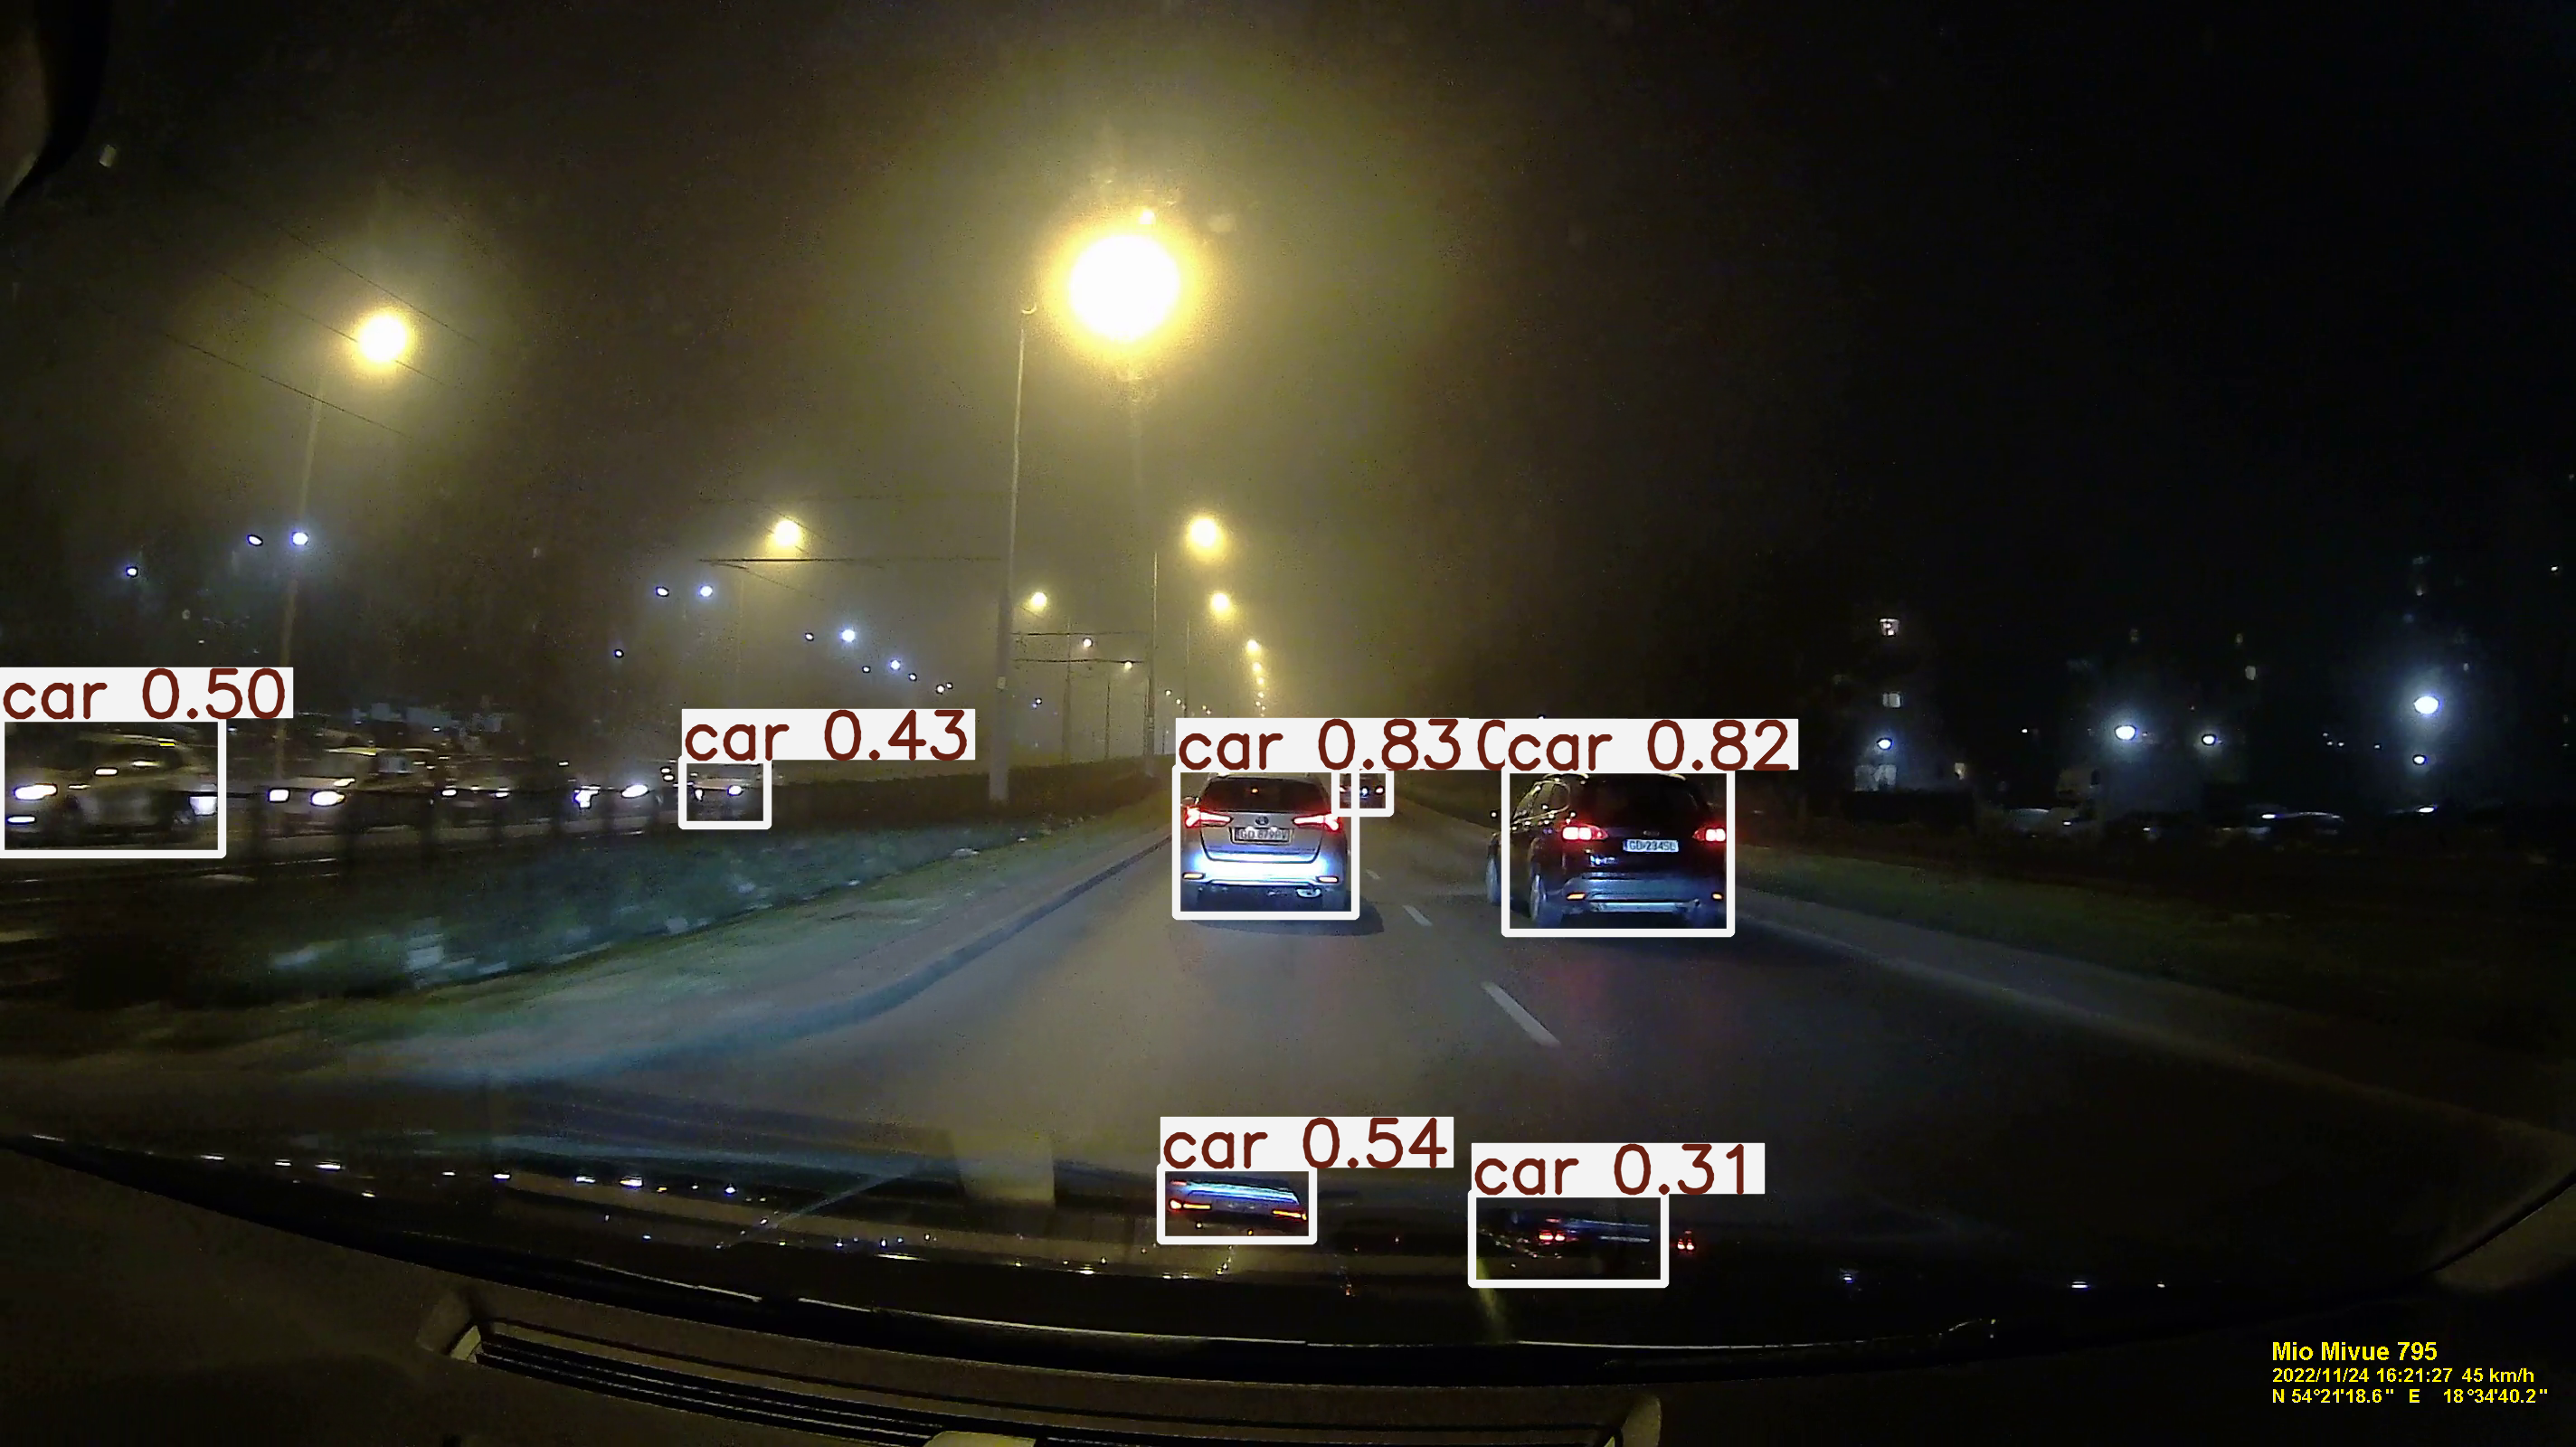

In [ ]:
import torch
import os

IMAGE_NUMBER = 32
IMAGES_DIR = "dataset/images"

image_path = None
for ext in [".jpg", ".jpeg", ".png"]:
    candidate = os.path.join(IMAGES_DIR, f"image{IMAGE_NUMBER}{ext}")
    if os.path.exists(candidate):
        image_path = candidate
        break

if image_path is None:
    raise FileNotFoundError("Nie znaleziono image1 z rozszerzeniem jpg/jpeg/png")

print("Wyświetlam:", image_path)

model = torch.hub.load(
    'ultralytics/yolov5',
    'yolov5s',
    pretrained=True
)

model.conf = 0.3

results = model(image_path)
results.show()



## Wyświetlanie zdjecia z ramkami ponumerowanymi, poprawianie ramek
Kod posłużył w celu poprawianiu ramek, dzięki temu programowi, wiadomo jaką ramkę usunąć, zmodyfikować za pomocą poniższych programów

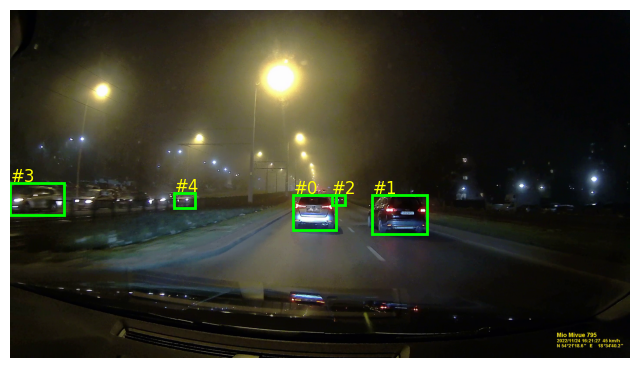

In [ ]:
from PIL import Image
import matplotlib.pyplot as plt
import os

IMAGE_NUMBER = 32
BASE_PATH = "dataset"

image_path = None
for ext in [".jpg", ".jpeg", ".png"]:
    p = os.path.join(BASE_PATH, "images", f"image{IMAGE_NUMBER}{ext}")
    if os.path.exists(p):
        image_path = p
        break

if image_path is None:
    raise FileNotFoundError("Nie znaleziono obrazu")

label_path = os.path.join(BASE_PATH, "labels", f"image{IMAGE_NUMBER}.txt")

img = Image.open(image_path)
w, h = img.size

plt.figure(figsize=(8, 6))
plt.imshow(img)

with open(label_path) as f:
    for i, line in enumerate(f):
        cls, xc, yc, bw, bh = map(float, line.split())

        x1 = (xc - bw / 2) * w
        y1 = (yc - bh / 2) * h
        x2 = (xc + bw / 2) * w
        y2 = (yc + bh / 2) * h

        plt.gca().add_patch(
            plt.Rectangle(
                (x1, y1),
                x2 - x1,
                y2 - y1,
                fill=False,
                edgecolor="lime",
                linewidth=2
            )
        )

        plt.text(x1, y1 - 5, f"#{i}", color="yellow", fontsize=12)

plt.axis("off")
plt.show()


## Czytanie zawartości konkretnego pliku (Ramki)

In [ ]:
with open("dataset/labels/image15.txt") as f:
    print(f.read())



0 0.579923 0.865456 0.138893 0.103028
0 0.492421 0.606677 0.068843 0.078917
0 0.470620 0.739566 0.055650 0.149079
0 0.624576 0.586427 0.075356 0.098798
0 0.542407 0.557743 0.023344 0.033390
0 0.342843 0.833930 0.078125 0.061722
0 0.407869 0.835380 0.078797 0.087410
0 0.284627 0.615433 0.051539 0.028400



## Usuwanie konretnej ramki.

In [ ]:
label_path = "dataset/labels/image32.txt"

with open(label_path) as f:
    lines = f.readlines()

del lines[5]

with open(label_path, "w") as f:
    f.writelines(lines)


# V. DATASET W PYTORCH

## Dataset w PyTorch
(TorchVision nie czyta YOLO .txt bezpośrednio, więc robimy Dataset pośredni.)

In [ ]:
import torch
from torch.utils.data import Dataset
from PIL import Image
import os

class CarDataset(Dataset):
    def __init__(self, images_dir, labels_dir, transforms=None):
        self.images_dir = images_dir
        self.labels_dir = labels_dir
        self.transforms = transforms
        self.images = sorted([
            f for f in os.listdir(images_dir)
            if f.endswith((".jpg", ".jpeg", ".png"))
        ])

    def __len__(self):
        return len(self.images)

    def __getitem__(self, idx):
        img_name = self.images[idx]
        img_path = os.path.join(self.images_dir, img_name)
        label_path = os.path.join(
            self.labels_dir, img_name.rsplit(".", 1)[0] + ".txt"
        )

        img = Image.open(img_path).convert("RGB")
        w, h = img.size

        boxes = []
        labels = []

        if os.path.exists(label_path):
            with open(label_path) as f:
                for line in f:
                    cls, xc, yc, bw, bh = map(float, line.split())

                    x1 = (xc - bw / 2) * w
                    y1 = (yc - bh / 2) * h
                    x2 = (xc + bw / 2) * w
                    y2 = (yc + bh / 2) * h

                    boxes.append([x1, y1, x2, y2])
                    labels.append(1)

        target = {
            "boxes": torch.tensor(boxes, dtype=torch.float32),
            "labels": torch.tensor(labels, dtype=torch.int64)
        }

        if self.transforms:
            img = self.transforms(img)

        return img, target


## Transformacje + Dataset

In [ ]:
from torchvision import transforms

transform = transforms.Compose([
    transforms.ToTensor()
])

dataset = CarDataset(
    images_dir="dataset/images",
    labels_dir="dataset/labels",
    transforms=transform
)


# VI. MODELE I EKSPERYMENTY

## Lista 4 modeli TorchVision
(YOLOv5 jako podstawa już jest)

In [ ]:
import torchvision

models = {
    "Faster R-CNN": torchvision.models.detection.fasterrcnn_resnet50_fpn(pretrained=True),
    "RetinaNet": torchvision.models.detection.retinanet_resnet50_fpn(pretrained=True),
    "SSD": torchvision.models.detection.ssd300_vgg16(pretrained=True),
    "FCOS": torchvision.models.detection.fcos_resnet50_fpn(pretrained=True),
}


Downloading: "https://download.pytorch.org/models/fasterrcnn_resnet50_fpn_coco-258fb6c6.pth" to /root/.cache/torch/hub/checkpoints/fasterrcnn_resnet50_fpn_coco-258fb6c6.pth


100%|██████████| 160M/160M [00:01<00:00, 136MB/s]


Downloading: "https://download.pytorch.org/models/retinanet_resnet50_fpn_coco-eeacb38b.pth" to /root/.cache/torch/hub/checkpoints/retinanet_resnet50_fpn_coco-eeacb38b.pth


100%|██████████| 130M/130M [00:03<00:00, 37.3MB/s]


Downloading: "https://download.pytorch.org/models/ssd300_vgg16_coco-b556d3b4.pth" to /root/.cache/torch/hub/checkpoints/ssd300_vgg16_coco-b556d3b4.pth


100%|██████████| 136M/136M [00:02<00:00, 48.2MB/s]


Downloading: "https://download.pytorch.org/models/fcos_resnet50_fpn_coco-99b0c9b7.pth" to /root/.cache/torch/hub/checkpoints/fcos_resnet50_fpn_coco-99b0c9b7.pth


100%|██████████| 124M/124M [00:01<00:00, 96.6MB/s]


## Porównanie 4 modeli
(Faster R-CNN, RetinaNet, SSD, FCOS)

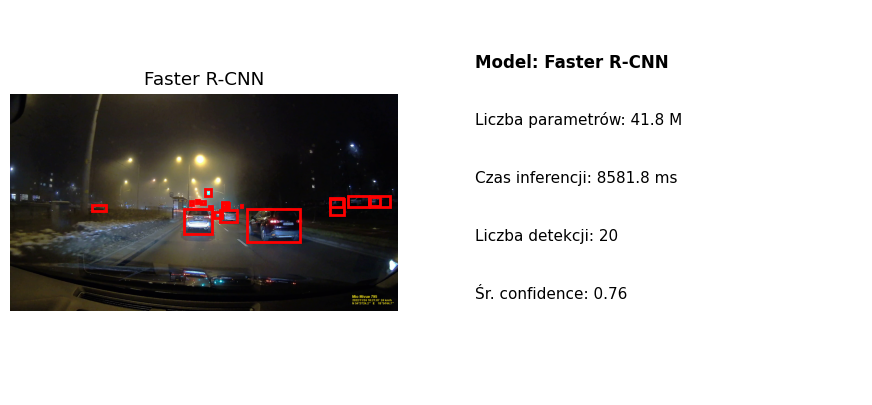

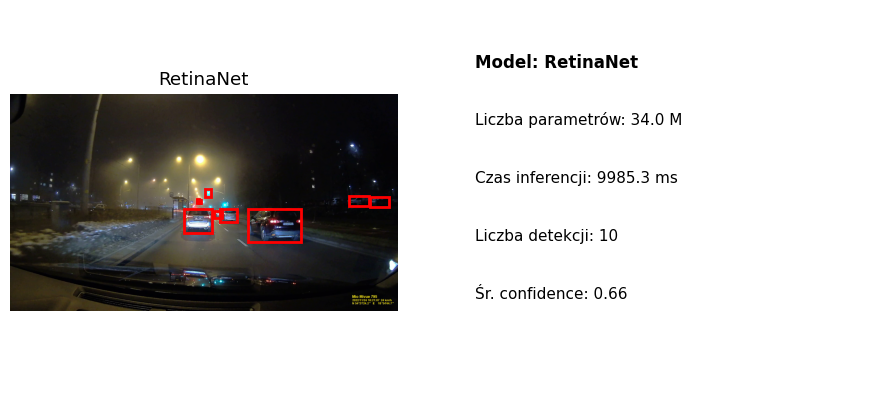

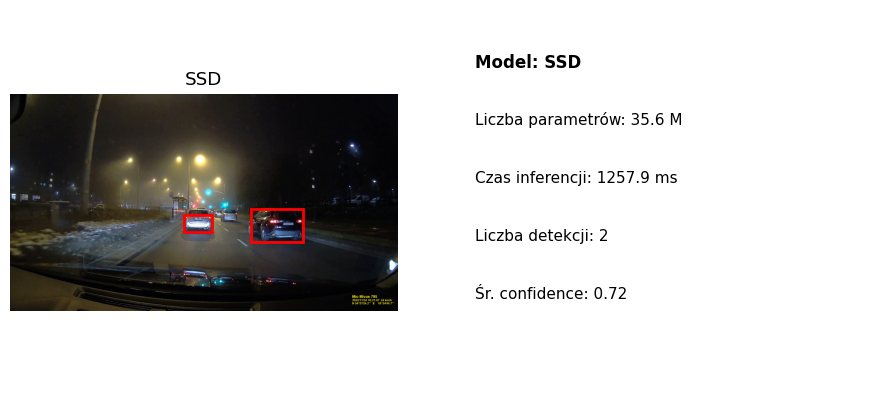

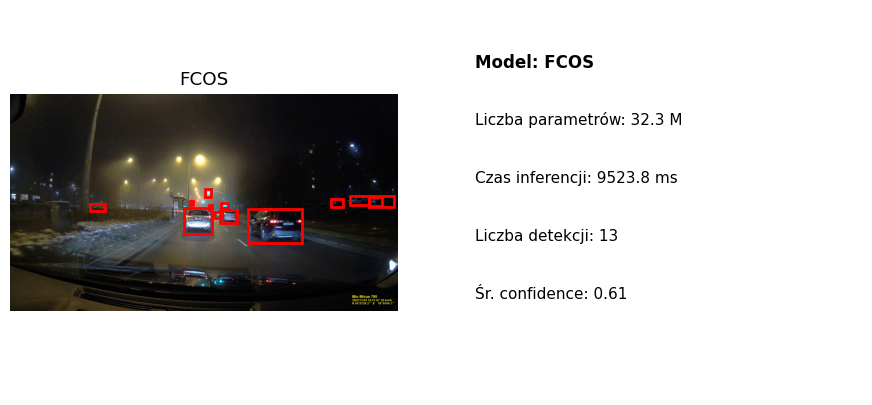

In [ ]:
import torch
import torchvision
import time
import matplotlib.pyplot as plt

image, _ = dataset[0]
image_batch = image.unsqueeze(0)
img_np = image.permute(1, 2, 0)

models = {
    "Faster R-CNN": torchvision.models.detection.fasterrcnn_resnet50_fpn(pretrained=True),
    "RetinaNet": torchvision.models.detection.retinanet_resnet50_fpn(pretrained=True),
    "SSD": torchvision.models.detection.ssd300_vgg16(pretrained=True),
    "FCOS": torchvision.models.detection.fcos_resnet50_fpn(pretrained=True),
}

CONF_THRESH = 0.5

for name, model in models.items():
    model.eval()

    num_params = sum(p.numel() for p in model.parameters()) / 1e6

    start = time.time()
    with torch.no_grad():
        outputs = model(image_batch)
    elapsed = (time.time() - start) * 1000  # ms

    boxes = outputs[0]["boxes"]
    scores = outputs[0]["scores"]

    num_detections = (scores > CONF_THRESH).sum().item()
    mean_conf = scores[scores > CONF_THRESH].mean().item() if num_detections > 0 else 0

    plt.figure(figsize=(11, 5))

    plt.subplot(1, 2, 1)
    plt.imshow(img_np)
    for box, score in zip(boxes, scores):
        if score < CONF_THRESH:
            continue
        x1, y1, x2, y2 = box
        plt.gca().add_patch(
            plt.Rectangle(
                (x1, y1),
                x2 - x1,
                y2 - y1,
                fill=False,
                edgecolor="red",
                linewidth=2
            )
        )
    plt.title(name)
    plt.axis("off")

    plt.subplot(1, 2, 2)
    plt.axis("off")
    plt.text(0, 0.85, f"Model: {name}", fontsize=12, weight="bold")
    plt.text(0, 0.70, f"Liczba parametrów: {num_params:.1f} M", fontsize=11)
    plt.text(0, 0.55, f"Czas inferencji: {elapsed:.1f} ms", fontsize=11)
    plt.text(0, 0.40, f"Liczba detekcji: {num_detections}", fontsize=11)
    plt.text(0, 0.25, f"Śr. confidence: {mean_conf:.2f}", fontsize=11)

    plt.show()


## Porównanie wszystkich 5 modeli
(Faster R-CNN, RetinaNet, SSD, FCOS, YOLOv5)

Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 2026-1-17 Python-3.12.12 torch-2.9.0+cpu CPU

Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
/root/.cache/torch/hub/ultralytics_yolov5_master/models/common.py:899: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):


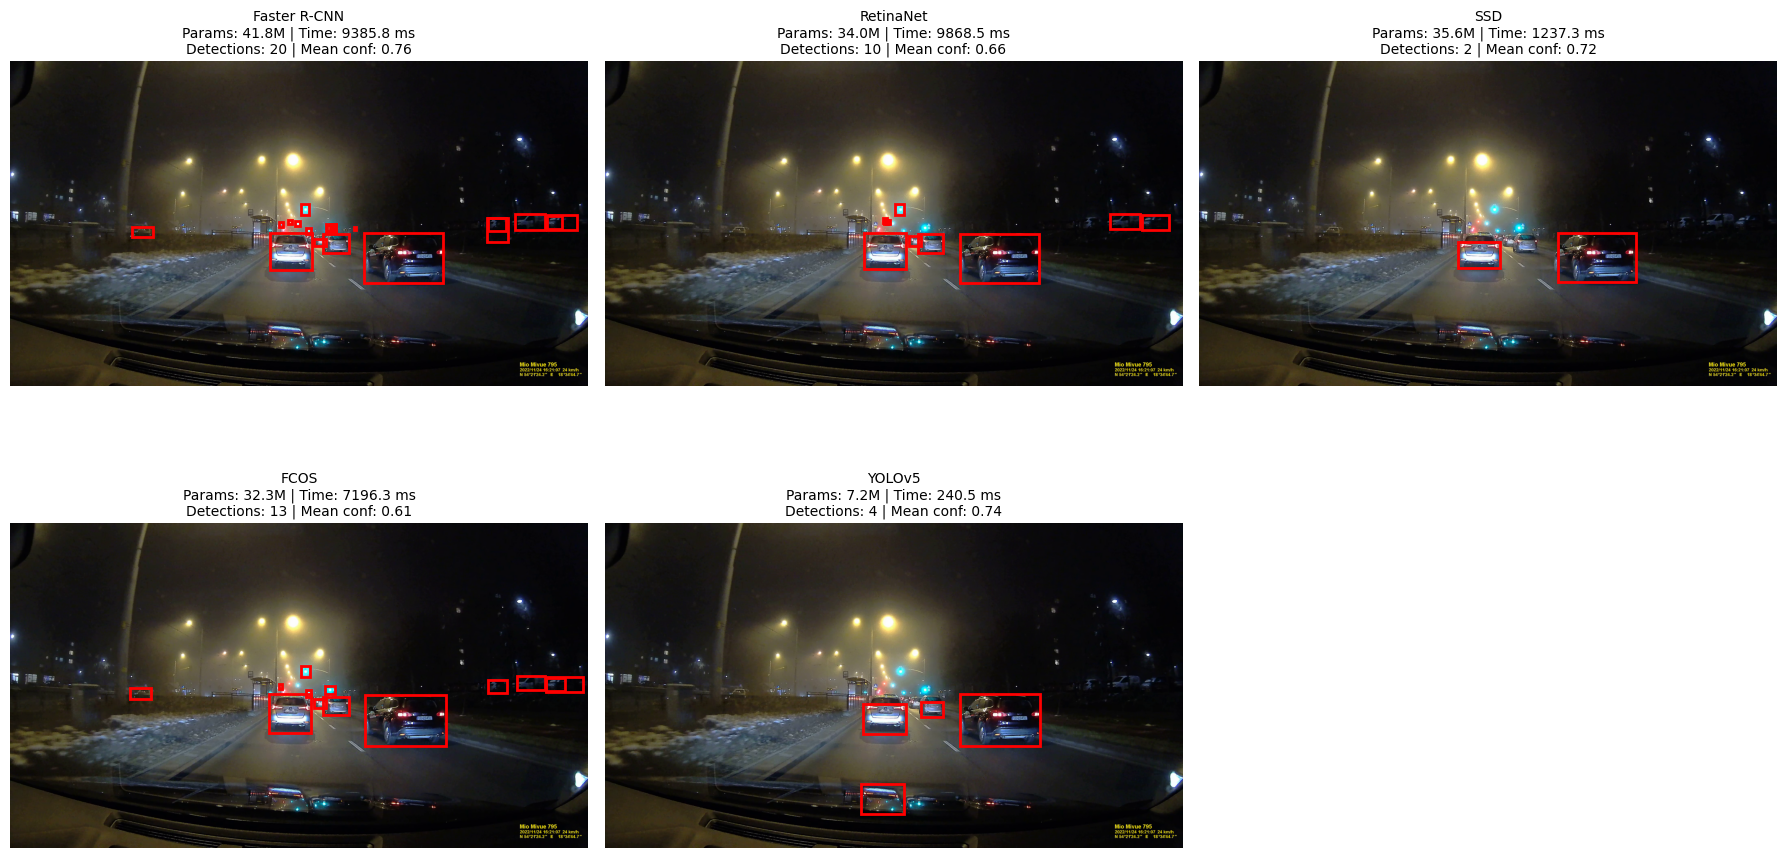

In [ ]:
import torch
import torchvision
import time
import matplotlib.pyplot as plt
from PIL import Image
import os

IMAGE_NUMBER = 1
CONF_THRESH = 0.5
BASE_PATH = "dataset"

image_path = None
for ext in [".jpg", ".jpeg", ".png"]:
    p = os.path.join(BASE_PATH, "images", f"image{IMAGE_NUMBER}{ext}")
    if os.path.exists(p):
        image_path = p
        break

if image_path is None:
    raise FileNotFoundError("Nie znaleziono obrazu")

img_pil = Image.open(image_path).convert("RGB")
img_tensor = torchvision.transforms.ToTensor()(img_pil)
image_batch = img_tensor.unsqueeze(0)
img_np = img_tensor.permute(1, 2, 0)

tv_models = {
    "Faster R-CNN": torchvision.models.detection.fasterrcnn_resnet50_fpn(pretrained=True),
    "RetinaNet": torchvision.models.detection.retinanet_resnet50_fpn(pretrained=True),
    "SSD": torchvision.models.detection.ssd300_vgg16(pretrained=True),
    "FCOS": torchvision.models.detection.fcos_resnet50_fpn(pretrained=True),
}

results_data = []

for name, model in tv_models.items():
    model.eval()

    num_params = sum(p.numel() for p in model.parameters()) / 1e6

    start = time.time()
    with torch.no_grad():
        outputs = model(image_batch)
    elapsed = (time.time() - start) * 1000

    boxes = outputs[0]["boxes"]
    scores = outputs[0]["scores"]

    valid = scores > CONF_THRESH
    boxes = boxes[valid]
    scores = scores[valid]

    mean_conf = scores.mean().item() if len(scores) > 0 else 0

    results_data.append((name, boxes, elapsed, num_params, len(scores), mean_conf))

# ========= YOLOv5 =========
yolo = torch.hub.load(
    "ultralytics/yolov5",
    "yolov5s",
    pretrained=True
)
yolo.conf = CONF_THRESH

start = time.time()
yolo_results = yolo(img_pil)
elapsed = (time.time() - start) * 1000

detections = yolo_results.xyxy[0]
boxes = detections[:, :4] if len(detections) > 0 else []
scores = detections[:, 4] if len(detections) > 0 else []

num_params = sum(p.numel() for p in yolo.model.parameters()) / 1e6
mean_conf = scores.mean().item() if len(scores) > 0 else 0

results_data.append(("YOLOv5", boxes, elapsed, num_params, len(scores), mean_conf))

plt.figure(figsize=(18, 10))

for idx, (name, boxes, elapsed, params, n_det, mean_conf) in enumerate(results_data):
    plt.subplot(2, 3, idx + 1)
    plt.imshow(img_np)

    for box in boxes:
        x1, y1, x2, y2 = box
        plt.gca().add_patch(
            plt.Rectangle(
                (x1, y1),
                x2 - x1,
                y2 - y1,
                fill=False,
                edgecolor="red",
                linewidth=2
            )
        )

    plt.title(
        f"{name}\n"
        f"Params: {params:.1f}M | "
        f"Time: {elapsed:.1f} ms\n"
        f"Detections: {n_det} | "
        f"Mean conf: {mean_conf:.2f}",
        fontsize=10
    )
    plt.axis("off")

plt.tight_layout()
plt.show()


# VII. DODATKOWY EKSPERYMENT – TRENING MODELU FASTER R-CNN



## DataLoader

In [ ]:
from torch.utils.data import DataLoader

def collate_fn(batch):
    return tuple(zip(*batch))

train_loader = DataLoader(
    dataset,
    batch_size=1,
    shuffle=True,
    collate_fn=collate_fn
)


## Model Faster R-CNN

In [ ]:
import torchvision
import torch

model = torchvision.models.detection.fasterrcnn_resnet50_fpn(pretrained=True)

num_classes = 2

in_features = model.roi_heads.box_predictor.cls_score.in_features
model.roi_heads.box_predictor = torchvision.models.detection.faster_rcnn.FastRCNNPredictor(
    in_features, num_classes
)

device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
model.to(device)


FasterRCNN(
  (transform): GeneralizedRCNNTransform(
      Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225])
      Resize(min_size=(800,), max_size=1333, mode='bilinear')
  )
  (backbone): BackboneWithFPN(
    (body): IntermediateLayerGetter(
      (conv1): Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
      (bn1): FrozenBatchNorm2d(64, eps=0.0)
      (relu): ReLU(inplace=True)
      (maxpool): MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
      (layer1): Sequential(
        (0): Bottleneck(
          (conv1): Conv2d(64, 64, kernel_size=(1, 1), stride=(1, 1), bias=False)
          (bn1): FrozenBatchNorm2d(64, eps=0.0)
          (conv2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
          (bn2): FrozenBatchNorm2d(64, eps=0.0)
          (conv3): Conv2d(64, 256, kernel_size=(1, 1), stride=(1, 1), bias=False)
          (bn3): FrozenBatchNorm2d(256, eps=0.0)
          (relu): ReLU(

## Optymalizator

In [ ]:
params = [p for p in model.parameters() if p.requires_grad]

optimizer = torch.optim.SGD(
    params,
    lr=0.005,
    momentum=0.9,
    weight_decay=0.0005
)


## Pętla treningowa

In [ ]:
NUM_EPOCHS = 3

for epoch in range(NUM_EPOCHS):
    model.train()
    epoch_loss = 0.0

    for images, targets in train_loader:
        images = [img.to(device) for img in images]
        targets = [{k: v.to(device) for k, v in t.items()} for t in targets]

        filtered_images = []
        filtered_targets = []

        for img, tgt in zip(images, targets):
            if tgt["boxes"].shape[0] == 0:
                continue
            filtered_images.append(img)
            filtered_targets.append(tgt)

        if len(filtered_images) == 0:
            continue

        loss_dict = model(filtered_images, filtered_targets)
        losses = sum(loss for loss in loss_dict.values())

        optimizer.zero_grad()
        losses.backward()
        optimizer.step()

        epoch_loss += losses.item()

    print(f"Epoch {epoch+1}/{NUM_EPOCHS}, Loss: {epoch_loss:.2f}")
